# Importing Python Packages

In [63]:
# Data Manipulation
import pandas as pd
import numpy as np


# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gridspec

# Machine Learning
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, SCORERS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Other
from scipy import stats

# Importing Data

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/melaniapanggabean/telecom_churn/master/telecom_churn.csv')
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [65]:
# Untuk mengetahui jumlah baris dan kolom pada dataset "Telecom_Churn"
# Terdiri dari 3333 baris dan 11 kolom

df.shape

(3333, 11)

In [66]:
# Untuk menampilkan deskriptif statistik dari dataset

data_describe = df.describe().T
data_describe

,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


In [67]:
# Melihat data duplicate
# Tidak terdapat data yang duplicate
df.duplicated().value_counts()

False    3333
dtype: int64

In [68]:
# Untuk mengetahui info yang terdapat dalam dataset dalam bentuk tabel
# Tidak ditemukan adanya data yang kosong. Sehingga dataset siap dianalisis dan kolom 'Churn' menjadi target feature

info = { 'Description' : ['1: cancelled, 0: not cancelled', 'number of weeks customer has had active account', '1: renewed contract, 0: not renewed contract', '1: data plan, 0: not data plan', 'gigabytes of monthly data usage',
                          'number of calls into customer service', 'average daytime minutes per month', 'average number of daytime calls', 'average monthly bill', 'largest overage fee in last 12 months', 'average number of roaming minutes'],
        'Data Type' : list(df.dtypes),
        'Data Nan' : list(df.isna().sum())}

data_info = pd.DataFrame(info, columns=['Description', 'Data Type', 'Data Nan'], index=list(df.columns))
data_info

,Description,Data Type,Data Nan
Churn,"1: cancelled, 0: not cancelled",int64,0
AccountWeeks,number of weeks customer has had active account,int64,0
ContractRenewal,"1: renewed contract, 0: not renewed contract",int64,0
DataPlan,"1: data plan, 0: not data plan",int64,0
DataUsage,gigabytes of monthly data usage,float64,0
CustServCalls,number of calls into customer service,int64,0
DayMins,average daytime minutes per month,float64,0
DayCalls,average number of daytime calls,int64,0
MonthlyCharge,average monthly bill,float64,0
OverageFee,largest overage fee in last 12 months,float64,0


# Exploratory Data Analysis

**Heatmap**

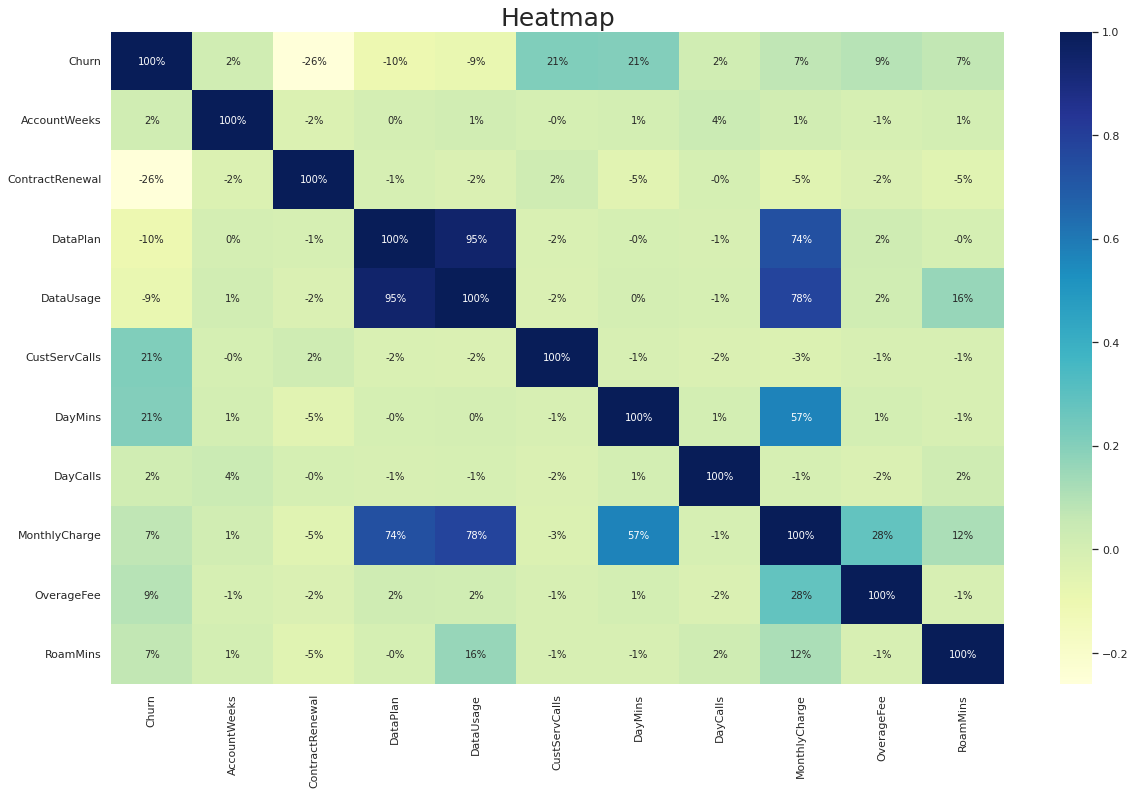

In [69]:
# Melihat korelasi antarkolom pada dataset telecom_churn.csv
# Jika korelasi antarkolom Perfect positive maka angka = 100%
# Jika korelasi High positive = 90%, Jika Low Positive = 50%
# Jika korelasi High negative = -90%, jika low negatif = -50%
# Jika tidak ada korelasi antarkolom maka angka = 0.0

plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='.0%')
plt.title("Heatmap", fontsize = 25)
plt.show()

**Insight :** 

Dari heatmap diatas dapat dilihat bahwa kolom yang memiliki korelasi positive yaitu kolom DataPlan dengan MonthlyCharge, kolom DataUsage dengan MonthlyCharge, kolom DayMins dengan MonthlyCharge, kolom DataPlan dengan DataUsage

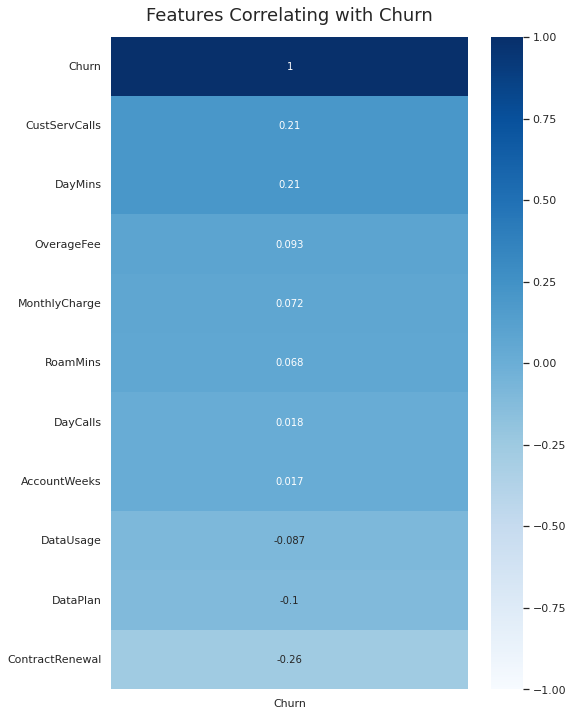

In [70]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Features Correlating with Churn', fontdict={'fontsize':18}, pad=16);

Labelling Column

In [71]:
# Memberikan label pada kolom binary features

df_edit = df.copy(deep=True)
df_edit.Churn = df_edit['Churn'].map({1: 'cancelled', 0: 'not cancelled'})
df_edit.ContractRenewal = df_edit['ContractRenewal'].map({1: 'renewed', 0: 'not renewed'})
df_edit.DataPlan = df_edit['DataPlan'].map({1: 'data plan', 0: 'no data plan'})

Pie Chart

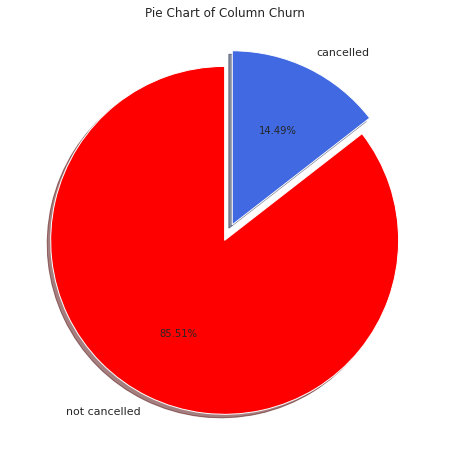

In [72]:
warna=['red','royalblue']
data = df_edit['Churn'].value_counts()
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(8,8))
plt.pie(data, explode=explode,  autopct='%.2f%%', shadow=True, startangle=90, 
        colors=warna, 
        labels=data.index)

plt.title('Pie Chart of Column Churn')
plt.show()

**Insight : **

Dari Pie Chart diatas dapat dilihat bahwa pada kolom ‘Churn’ sebanyak 2850 pelanggan (85.51%) tidak melakukan cancelled service, dan sebanyak 483 pelanggan (14.49%) melakukan cancelled service.


In [73]:
df_edit.Churn.value_counts().to_frame()

,Churn
not cancelled,2850
cancelled,483


Binary Features: 'ContractRenewal' and 'DataPlan'

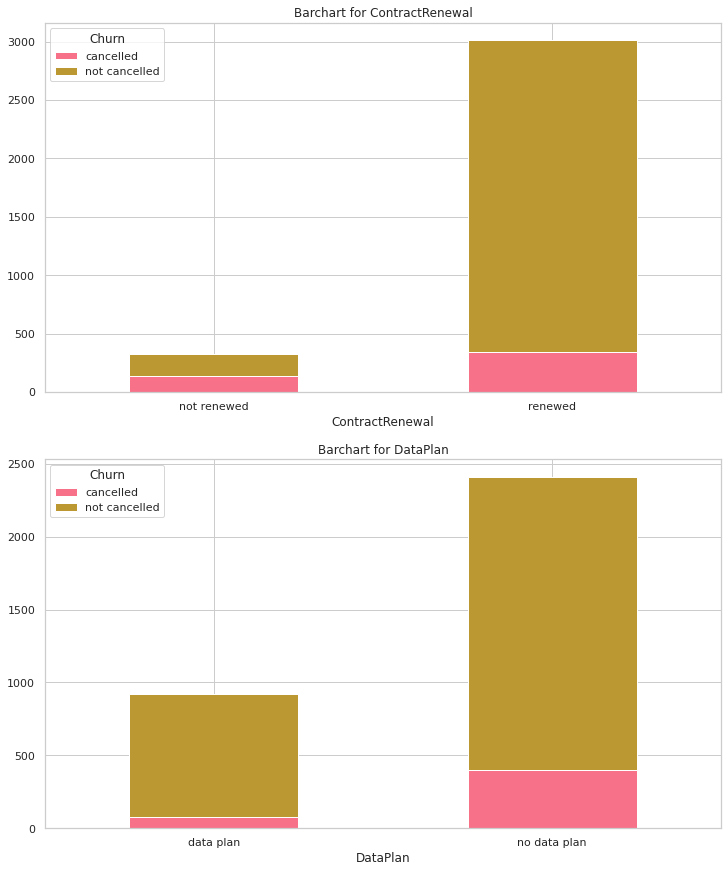

In [74]:
fig = plt.figure(constrained_layout=True, figsize=(10, 12))


grid = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('Barchart for ContractRenewal')

sns.set_style("whitegrid")
df_plot = df_edit.groupby(['Churn', 'ContractRenewal']).size().reset_index().pivot(columns = 'Churn', index = 'ContractRenewal', values = 0)
df_plot.plot(kind = 'bar', stacked = True,  ax=ax1)
plt.xticks(rotation = 0)


ax2 = fig.add_subplot(grid[1, :2])

ax2.set_title('Barchart for DataPlan')

sns.set_style("whitegrid")
df_plot = df_edit.groupby(['Churn', 'DataPlan']).size().reset_index().pivot(columns = 'Churn', index = 'DataPlan', values = 0)
df_plot.plot(kind = 'bar', stacked = True, ax=ax2)
plt.xticks(rotation = 0)


plt.show()

In [75]:
df_edit.ContractRenewal.value_counts().to_frame()

,ContractRenewal
renewed,3010
not renewed,323


In [76]:
df_edit.DataPlan.value_counts().to_frame()

,DataPlan
no data plan,2411
data plan,922


In [77]:
print("not cancelled service:0 and Cancelled Service:1")
mean_df = df.mean().reset_index()
mean_df.columns = ['Feature', 'Mean']
mean_df.set_index('Feature')

not cancelled service:0 and Cancelled Service:1


,Mean
Feature,
Churn,0.144914
AccountWeeks,101.064806
ContractRenewal,0.903090
DataPlan,0.276628
DataUsage,0.816475
CustServCalls,1.562856
DayMins,179.775098
DayCalls,100.435644
MonthlyCharge,56.305161


In [78]:
print("not cancelled service:0")
mean_df = df.loc[df["Churn"]==0].mean().reset_index()
mean_df.columns = ['Feature', 'Mean']
mean_df.set_index('Feature')

not cancelled service:0


,Mean
Feature,
Churn,0.000000
AccountWeeks,100.793684
ContractRenewal,0.934737
DataPlan,0.295439
DataUsage,0.862151
CustServCalls,1.449825
DayMins,175.175754
DayCalls,100.283158
MonthlyCharge,55.816246


In [79]:
print("Cancelled service:1")
mean_df = df.loc[df["Churn"]==1].mean().reset_index()
mean_df.columns = ['Feature', 'Mean']
mean_df.set_index('Feature')

Cancelled service:1


,Mean
Feature,
Churn,1.000000
AccountWeeks,102.664596
ContractRenewal,0.716356
DataPlan,0.165631
DataUsage,0.546957
CustServCalls,2.229814
DayMins,206.914079
DayCalls,101.335404
MonthlyCharge,59.190062


All non-binary features

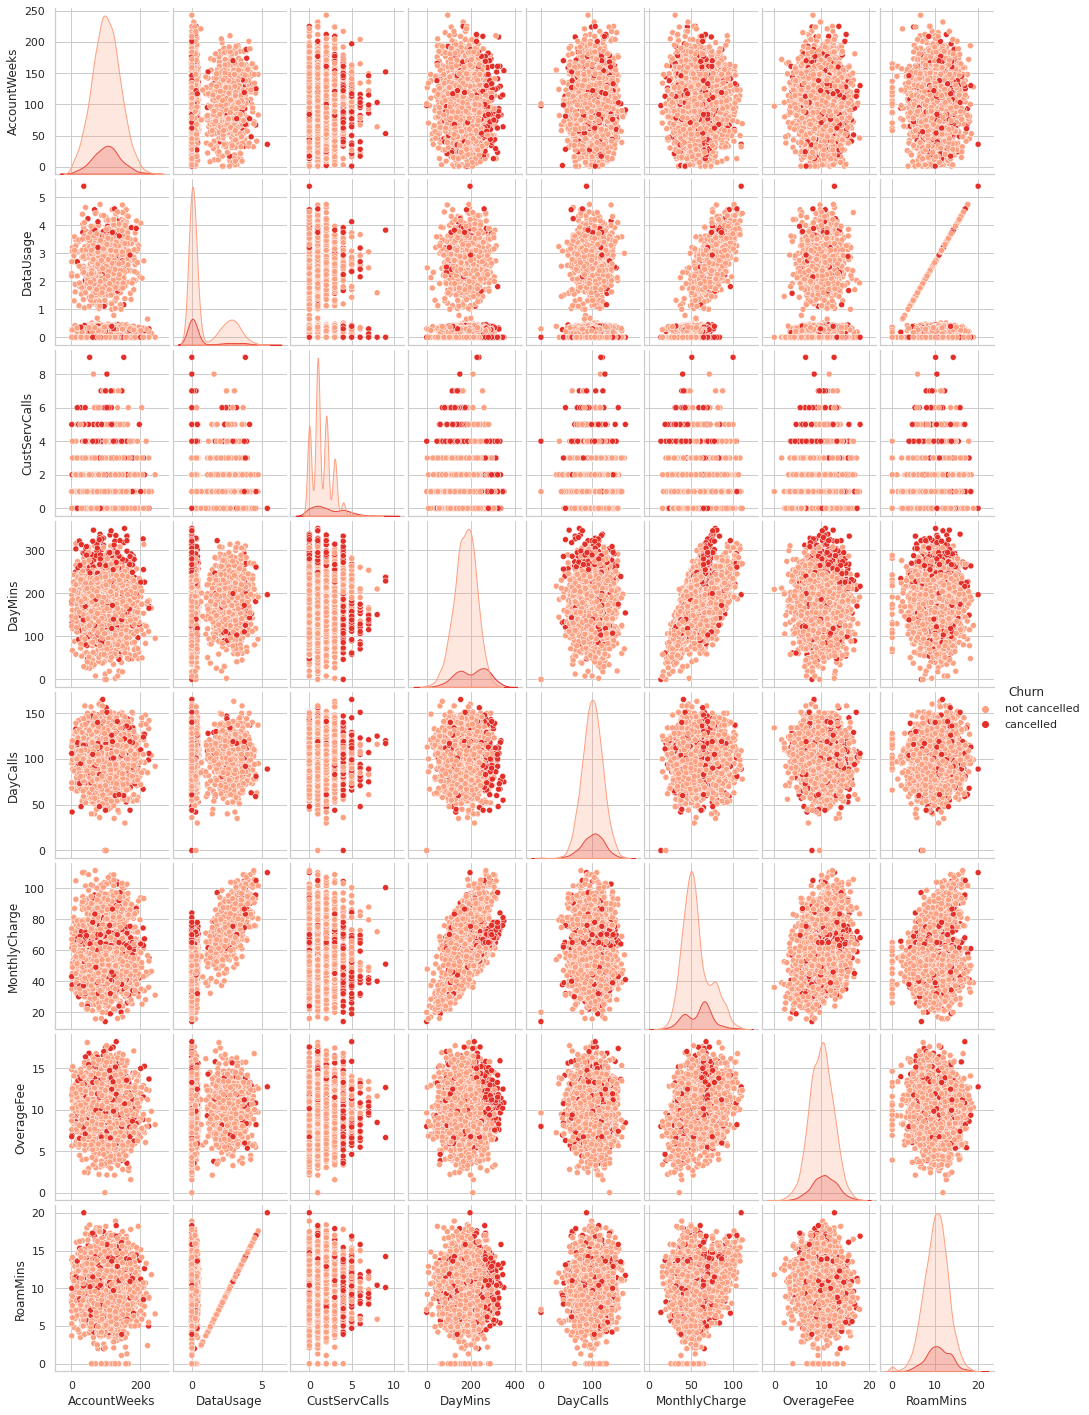

In [80]:
g = sns.pairplot(data = df_edit[['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
               'RoamMins', 'Churn']],
            hue="Churn", palette='Reds')
g.fig.set_figheight(20)
g.fig.set_figwidth(15)
plt.show()

Continuous variable columns

In [81]:
def boxplots (df_edit, variables, n_rows=None, n_cols=None, hue="Churn"):
    
    fig=plt.figure(figsize=(20,16))
    sns.set(palette="husl")
    for i, var in enumerate(variables):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        sns.boxplot(y=var, x=hue, hue=hue, data=df_edit, ax=ax).set_title(var)
    plt.show()

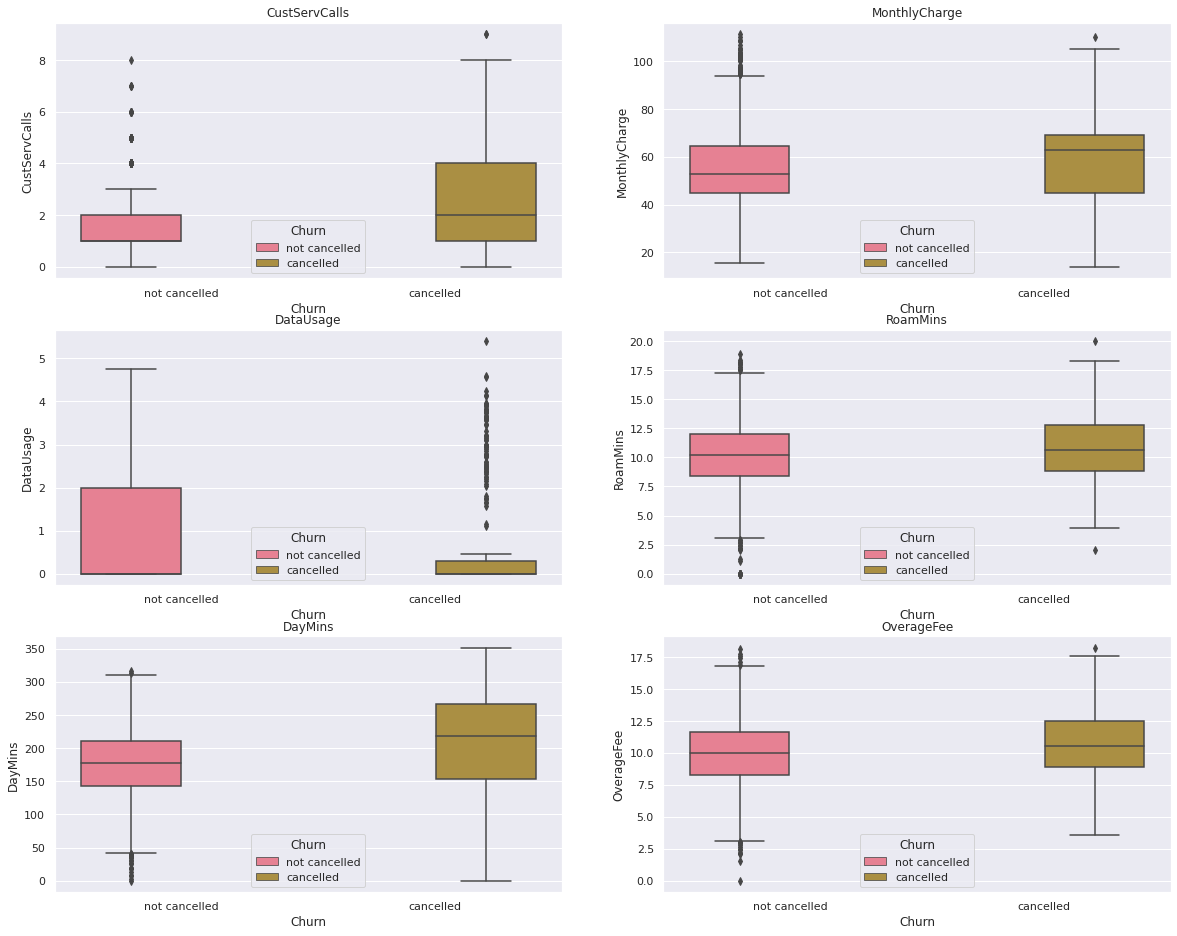

In [82]:
continue_variables = df_edit[["CustServCalls", "MonthlyCharge", "DataUsage", "RoamMins", "DayMins", "OverageFee"]]

boxplots(df_edit, continue_variables, 3, 2)

Insight:

1. Untuk pelanggan yang melakukan cancelled service / churn mempunyai biaya Monthly charge sekitar 15 dollar lebih tinggi daripada yang tidak churn

2. Untuk pelanggan yang melakukan DayMins lebih dari 250 menit cenderung mengalami churn atau berpindah ke operator lain

3. Untuk pelanggan yang melakukan cancelled service / churn memiliki overage fee yang lebih besar daripada yang tidak churn

4. Untuk pelanggan yang melakuakn cancelled service / churn cenderung menggunakan layanan roaming yang tinggi

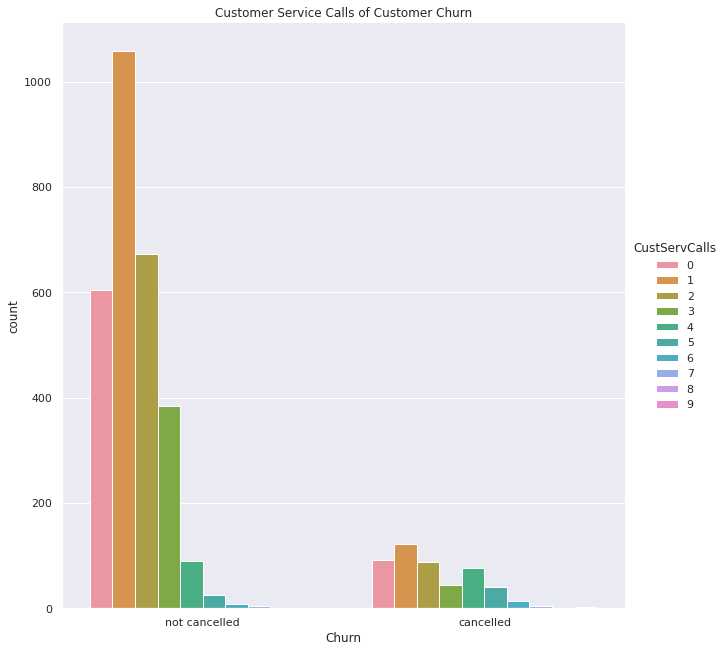

In [83]:
g = sns.catplot(x="Churn", hue="CustServCalls", 
                data=df_edit, kind="count",
                height=9).set(title='Customer Service Calls of Customer Churn')

**Insight** 

Dari grafik diatas menggambarkan berapa kali pelanggan melakukan panggilan pada customer service provider yang digunakan. Dapat dilihat untuk kasus cancelled dan not cancelled service paling banyak pelanggan melakukan panggilan sebanyak 1 kali. Pelanggan yang not cancelled service kebanyakan melakukan panggilan sebanyak 1-3 kali. Sedangkan pelanggan yang melakukan cancelled service paling banyak melakukan panggilan sebanyak 4 kali dibanding dengan 3 kali panggilan.

# Data Preparation

Split data for train and test

In [84]:
x =  df.drop(['Churn'], axis=1)
y =  df['Churn']

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2666, 10)
(2666,)
(667, 10)
(667,)


Resampling

Pada diagram pie chart, fitur target 'churn' memiliki data yang imbalance. Dimana sebanyak 2850 (85.51%) pelanggan tidak melakukan cancelled service sedangkan sebanyak 483 (14.49%) pelanggan melakukan cancelled service. Oleh karena itu, kami melakukan Upsampling dan Downsampling data pada data training sebelum menyesuaikan dengan machine learning models yang akan dibuat nantinya. Sehingga kita dapat melihat model dan metode resampling mana yang bekerja paling baik pada data testing.

In [86]:
# Menggabungkan x_train and y_train
df_train = x_train.merge(y_train.to_frame(), left_index = True, right_index = True)

# Memberikan indeks pada masing-masing kelas df_train
df_train0 = df_train[df_train['Churn'] == 0]
df_train1 = df_train[df_train['Churn'] == 1]

# Melihat jumlah anggota dari masing-masing kelas df_train
n_0 = len(df_train0)
n_1 = len(df_train1)

# Downsampling
df_train0_ds = resample(df_train0, replace = False, n_samples = n_1, random_state = 123)
df_train_ds = pd.concat([df_train0_ds, df_train1])
print("Downsampled Dataset Class Counts:", df_train_ds.Churn.value_counts(), sep = "\n")

# Upsampling
df_train1_us = resample(df_train1, replace = True, n_samples = n_0, random_state = 123)
df_train_us = pd.concat([df_train1_us, df_train0])
print("\nUpsampled Dataset Class Counts:", df_train_us.Churn.value_counts(), sep = "\n")

# Memisahkan y and X
y_train_ds = df_train_ds['Churn']
x_train_ds = df_train_ds.iloc[:, 0:10]

y_train_us = df_train_us['Churn']
x_train_us = df_train_us.iloc[:, 0:10]

Downsampled Dataset Class Counts:
0    386
1    386
Name: Churn, dtype: int64

Upsampled Dataset Class Counts:
1    2280
0    2280
Name: Churn, dtype: int64


# ML - Models

In [87]:
# Set up function which uses an algo as input and returns the accuracy score and AUROC for the input data

def _alg_fit(alg, x_train, y_train, params=None, scoring=None, cv=None):
    
    if params: # hyperparameter tuning if params dict is passed
        if not scoring:
            raise ValueError("If params dict is defined, then also a scoring metric has to be defined.")
        if not cv:
            raise ValueError("If params dict is defined, then also the number of folds (cv) has to be defined.")
        rscv = RandomizedSearchCV(alg, params, scoring=scoring, random_state=42, n_jobs=-1, cv=cv)
        mod = rscv.fit(x_train, y_train)
        print(f"Best {scoring}-score during GS: {mod.best_score_}")
        print("Best params from GS:\n", mod.best_params_)
    else: # else simply fit
        mod = alg.fit(x_train, y_train)
    
    # Prediction
    y_pred = mod.predict(x_test)
    
    # Accuracy Score
    acc_score = accuracy_score(y_test, y_pred)
    print("Accuracy Score: ", acc_score)
    
    # AUROC
    prob_y = mod.predict_proba(x_test)
    prob_y = [p[1] for p in prob_y]
    auroc_score = roc_auc_score(y_test, prob_y)
    print("AUROC Score:", auroc_score)

In [88]:
# Set up function which uses function _alg_fit and returns a comparison of the accuracy score and AUROC for imbalanced, downsampled and upsampled data

def compare_results(alg, params=None, scoring=None, cv=None):
    # Unsampled Dataset
    print("IMBALANCED CLASSES")
    _alg_fit(alg, x_train, y_train, params=params, scoring=scoring, cv=cv)

    # Downsampled majority class
    print("\nDOWNSAMPLED MAJORITY CLASS")
    _alg_fit(alg, x_train_ds, y_train_ds, params=params, scoring=scoring, cv=cv)

    # Upsampled minority class
    print("\nUPSAMPLED MINORITY CLASS")
    _alg_fit(alg, x_train_us, y_train_us, params=params, scoring=scoring, cv=cv)

Logistic Regression

In [89]:
params_lr = {
    'penalty': ['l2', 'none'],
    'tol': stats.uniform(loc=0.0001, scale=0.0001),
    'max_iter': stats.randint(low=300, high=800),
}

lr = LogisticRegression(n_jobs=-1, random_state=0)
compare_results(lr, params=params_lr, scoring='roc_auc', cv=5)

IMBALANCED CLASSES
Best roc_auc-score during GS: 0.8097791097791097
Best params from GS:
 {'max_iter': 449, 'penalty': 'l2', 'tol': 0.00019699098521619944}
Accuracy Score:  0.8665667166416792
AUROC Score: 0.832627961656719

DOWNSAMPLED MAJORITY CLASS
Best roc_auc-score during GS: 0.814696991320368
Best params from GS:
 {'max_iter': 402, 'penalty': 'none', 'tol': 0.00019507143064099162}
Accuracy Score:  0.7616191904047976
AUROC Score: 0.8278169650931453

UPSAMPLED MINORITY CLASS
Best roc_auc-score during GS: 0.8142938211757464
Best params from GS:
 {'max_iter': 630, 'penalty': 'l2', 'tol': 0.00018661761457749353}
Accuracy Score:  0.7661169415292354
AUROC Score: 0.8347983360463014


Decision Tree

In [90]:
params_dt = {
    'max_depth': stats.randint(low=5, high=20),
    'min_samples_split': stats.randint(low=2, high=10),
    'min_samples_leaf': stats.randint(low=1, high=5),
}

dectree = DecisionTreeClassifier(criterion='entropy', random_state=0)
compare_results(dectree, params=params_dt, scoring='roc_auc', cv=5)

IMBALANCED CLASSES
Best roc_auc-score during GS: 0.8657849825612984
Best params from GS:
 {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy Score:  0.9415292353823088
AUROC Score: 0.921287755471152

DOWNSAMPLED MAJORITY CLASS
Best roc_auc-score during GS: 0.8449924534340119
Best params from GS:
 {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy Score:  0.8860569715142429
AUROC Score: 0.8886507505878097

UPSAMPLED MINORITY CLASS
Best roc_auc-score during GS: 0.9640322022160663
Best params from GS:
 {'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 7}
Accuracy Score:  0.8725637181409296
AUROC Score: 0.820898896726352


Random Forest

In [91]:
params_rf = {
    'n_estimators': stats.randint(low=100, high=500),
    'max_depth': stats.randint(low=5, high=20),
    'min_samples_split': stats.randint(low=2, high=10),
    'min_samples_leaf': stats.randint(low=1, high=5),
}
rfc = RandomForestClassifier(criterion='entropy', random_state=0, n_jobs=-1)
compare_results(rfc, params=params_rf, scoring='roc_auc', cv=5)

IMBALANCED CLASSES
Best roc_auc-score during GS: 0.9030325668483563
Best params from GS:
 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 444}
Accuracy Score:  0.9565217391304348
AUROC Score: 0.9301862904684391

DOWNSAMPLED MAJORITY CLASS
Best roc_auc-score during GS: 0.8853929620163387
Best params from GS:
 {'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 370}
Accuracy Score:  0.8875562218890555
AUROC Score: 0.9195876288659793

UPSAMPLED MINORITY CLASS
Best roc_auc-score during GS: 0.9988015543244074
Best params from GS:
 {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 413}
Accuracy Score:  0.9460269865067467
AUROC Score: 0.924290106710074


Confusion Metrics

In [92]:
# Untuk melihat best algorithm

algorithm = [rfc, dectree, lr]
names = ["RandomForestClassifier", "DecisionTreeClassifier", "LogisticRegression"]

# Return confusion matrices (absolute), precision dan recall
j = 0
for i in algorithm:
    mod = i.fit(x_train_us, y_train_us)
    y_pred = mod.predict(x_test)
    con_mat = confusion_matrix(y_test, y_pred)
    acc = (con_mat[0][0] + con_mat[1][1])/(con_mat[0][0] + con_mat[1][1] + con_mat[0][1] + con_mat[1][0])
    prec = (con_mat[0][0])/(con_mat[0][0] + con_mat[0][1])
    rec = (con_mat[0][0])/(con_mat[0][0] + con_mat[1][0])
    print("\n", names[j], "Confusion Matrix:\n", con_mat, "\nPrecision: ", prec, "\nRecall: ", rec, "\nAccuracy: ", acc)
    j = j + 1


 RandomForestClassifier Confusion Matrix:
 [[559  11]
 [ 23  74]] 
Precision:  0.980701754385965 
Recall:  0.9604810996563574 
Accuracy:  0.9490254872563718

 DecisionTreeClassifier Confusion Matrix:
 [[527  43]
 [ 30  67]] 
Precision:  0.9245614035087719 
Recall:  0.9461400359066428 
Accuracy:  0.8905547226386806

 LogisticRegression Confusion Matrix:
 [[431 139]
 [ 26  71]] 
Precision:  0.756140350877193 
Recall:  0.9431072210065645 
Accuracy:  0.7526236881559221


Dapat dilihat bahwa Model Random Forest Classifier memiliki nilai AUROC-Score, Accuracy, Recall dan Precision yang paling tinggi

# Insight

In [93]:
# Menggunakan Algoritma Random Forest untuk melihat feature importance


df_feature_importance = pd.DataFrame(rfc.feature_importances_, index = x_train_us.columns, 
                                     columns = ['feature importance']).sort_values('feature importance', 
                                                                                   ascending = False)
df_feature_importance

,feature importance
DayMins,0.168671
MonthlyCharge,0.154507
CustServCalls,0.149221
OverageFee,0.105827
RoamMins,0.092737
ContractRenewal,0.086582
AccountWeeks,0.077681
DayCalls,0.076204
DataUsage,0.069015
DataPlan,0.019555
